In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from xgboost import XGBClassifier


# py -m pip install matplotlib

In [2]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [3]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [4]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7, 10],           # Maximum depth of a tree
    'subsample': [0.5, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.3, 0.5, 0.7]  # Subsample ratio of columns when constructing each tree
}

random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_dist, 
                                   cv=5,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

# Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
# Best score: 0.7759909304076817
# Best cross-validation accuracy: 0.776

Accuracy: 0.9768507132316773
F1: 0.7865041111426141
AUC: 0.9434596346097266


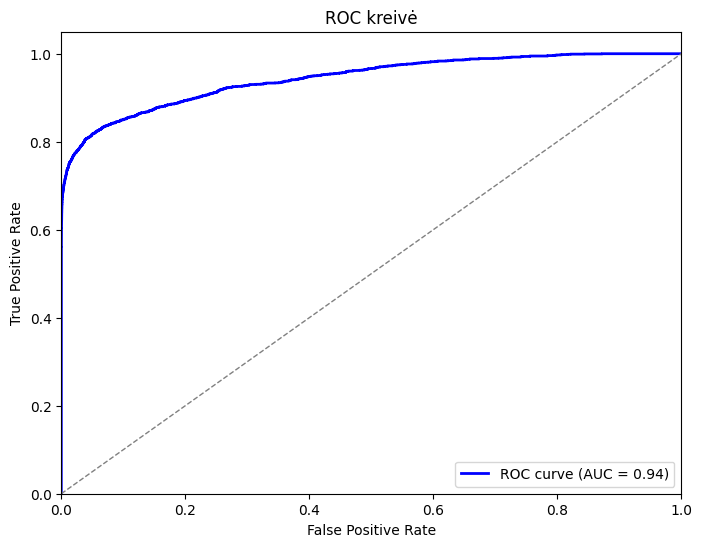

In [13]:

best_model = XGBClassifier(
    n_estimators=300,      
    learning_rate=0.1,   
    max_depth=5,          
    subsample=0.8,         
    colsample_bytree=0.5,
    use_label_encoder=False,
    enable_categorical=True
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9768507132316773
# F1: 0.7865041111426141
# AUC: 0.9434596346097266

In [6]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7, 10],           # Maximum depth of a tree
    'subsample': [0.5, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.3, 0.5, 0.7]  # Subsample ratio of columns when constructing each tree
}

random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_dist, 
                                   cv=5,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_enn, y_train_enn)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

# Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
# Best score: 0.7859424664654573
# Best cross-validation accuracy: 0.786

Accuracy: 0.9766969995081161
F1: 0.7881498043599776
AUC: 0.9429190689027024


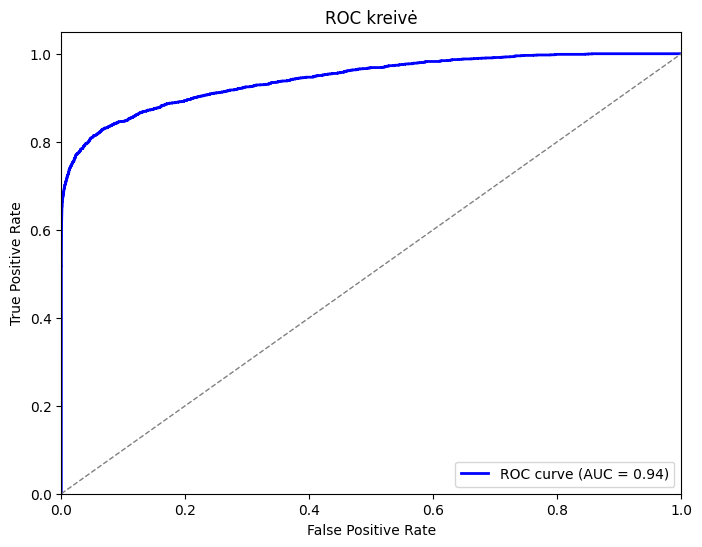

In [7]:

best_model = XGBClassifier(
    n_estimators=300,      
    learning_rate=0.1,   
    max_depth=5,          
    subsample=0.8,         
    colsample_bytree=0.5,
    use_label_encoder=False,
    enable_categorical=True
)

best_model.fit(X_train_enn, y_train_enn)

y_pred_enn = best_model.predict(X_test)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
print("Accuracy:", accuracy_enn)

f1_enn = f1_score(y_test, y_pred_enn)
print("F1:", f1_enn)

y_prob_enn = best_model.predict_proba(X_test)[:, 1]
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_prob_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
print("AUC:", auc_score_enn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9766969995081161
# F1: 0.7881498043599776
# AUC: 0.9429190689027024

In [8]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn']              

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7, 10],           # Maximum depth of a tree
    'subsample': [0.5, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.3, 0.5, 0.7]  # Subsample ratio of columns when constructing each tree
}

random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_dist, 
                                   cv=5,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

# Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
# Best score: 0.9728102382902574
# Best cross-validation accuracy: 0.973

Accuracy: 0.9743605509099852
F1: 0.7711306256860593
AUC: 0.9325572937206958


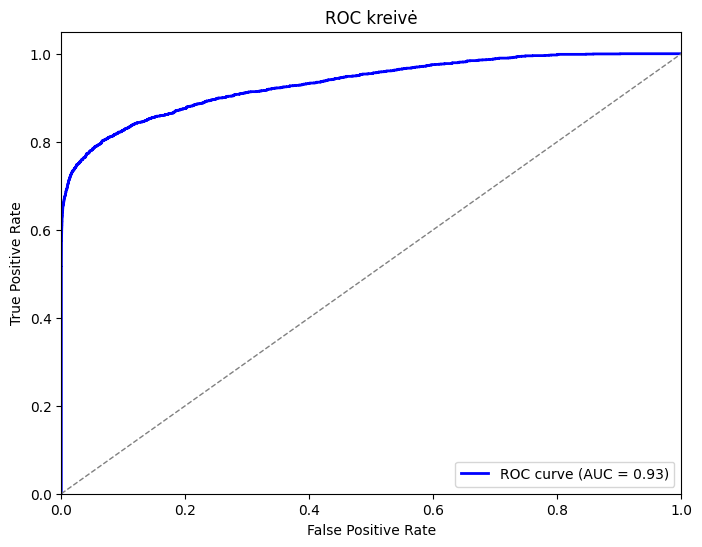

In [14]:

best_model = XGBClassifier(
    n_estimators=300,      
    learning_rate=0.1,   
    max_depth=5,           
    subsample=0.8,         
    colsample_bytree=0.5,
    use_label_encoder=False,
    enable_categorical=True
)

best_model.fit(X_train_sm, y_train_sm)

y_pred_sm = best_model.predict(X_test)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
print("Accuracy:", accuracy_sm)

f1_sm = f1_score(y_test, y_pred_sm)
print("F1:", f1_sm)

y_prob_sm = best_model.predict_proba(X_test)[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_prob_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
print("AUC:", auc_score_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9743605509099852
# F1: 0.7711306256860593
# AUC: 0.9325572937206958

In [5]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],      # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7, 10, 15, 20],           # Maximum depth of a tree
    'subsample': [0.5, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0]  # Subsample ratio of columns when constructing each tree
}

random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_dist, 
                                   cv=5,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_smt, y_train_smt)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))


# Best parameters: {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
# Best score: 0.9841780424996859
# Best cross-validation accuracy: 0.984

Accuracy: 0.9764818002951303
F1: 0.7898928865696238
AUC: 0.940216122994485


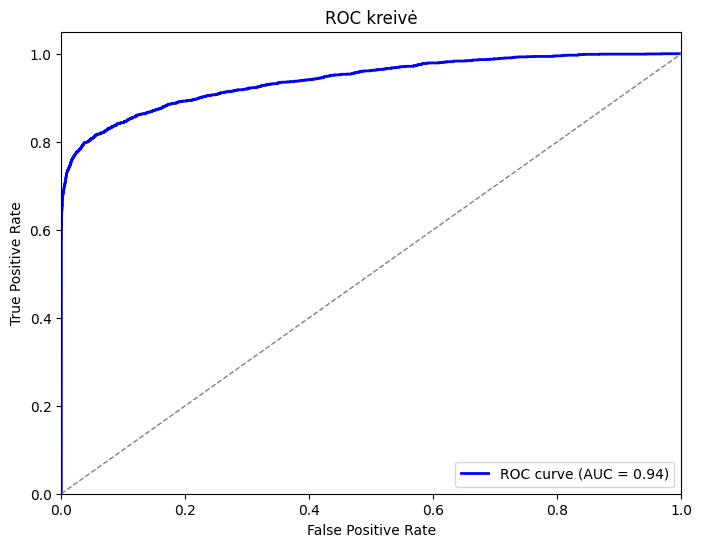

In [8]:

best_model_smt = XGBClassifier(
    n_estimators=400,      
    learning_rate=0.1,   
    max_depth=10,           
    subsample=0.5,         
    colsample_bytree=1.0,
    use_label_encoder=False,
    enable_categorical=True
)

best_model_smt.fit(X_train_smt, y_train_smt)

y_pred_smt = best_model_smt.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model_smt.predict_proba(X_test)[:, 1]
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

<Axes: >

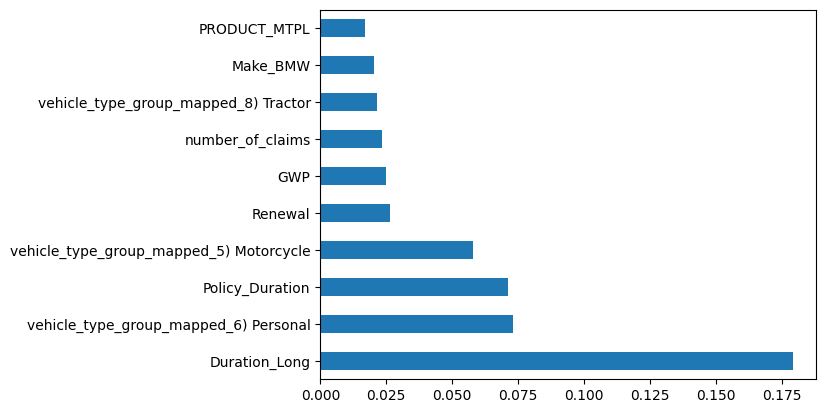

In [9]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [10]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

city_columns = [col for col in X_train_smt.columns if 'City' in col]
city_distributions = X_train_smt[city_columns].mean() 

weighted_importances_city = feat_importances[city_columns] * city_distributions

average_importance_city = weighted_importances_city.sum()         

print("Combined Feature Importance for 'City':", average_importance_city)

Combined Feature Importance for 'City': 0.008360578186368137


In [11]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

type_columns = [col for col in X_train_smt.columns if 'vehicle_type' in col]
type_distributions = X_train_smt[type_columns].mean() 

weighted_importances_type = feat_importances[type_columns] * type_distributions

average_importance_type = weighted_importances_type.sum()

print("Combined Feature Importance for 'type':", average_importance_type)

Combined Feature Importance for 'type': 0.07176006210166079


In [12]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

Duration_columns = [col for col in X_train_smt.columns if 'Duration' in col]
Duration_distributions = X_train_smt[Duration_columns].mean() 

weighted_importances_Duration = feat_importances[Duration_columns] * Duration_distributions

average_importance_Duration = weighted_importances_Duration.sum()

print("Combined Feature Importance for 'type':", average_importance_Duration)

Combined Feature Importance for 'type': 0.16495960702376594


In [13]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

PRODUCT_columns = [col for col in X_train_smt.columns if 'PRODUCT' in col]
PRODUCT_distributions = X_train_smt[PRODUCT_columns].mean() 

weighted_importances_PRODUCT = feat_importances[PRODUCT_columns] * PRODUCT_distributions

average_importance_PRODUCT = weighted_importances_PRODUCT.sum()

print("Combined Feature Importance for 'type':", average_importance_PRODUCT)

Combined Feature Importance for 'type': 0.0165791784501245


In [14]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

Make_columns = [col for col in X_train_smt.columns if 'Make' in col]
Make_distributions = X_train_smt[Make_columns].mean() 

weighted_importances_Make = feat_importances[Make_columns] * Make_distributions

average_importance_Make = weighted_importances_Make.sum()

print("Combined Feature Importance for 'type':", average_importance_Make)

Combined Feature Importance for 'type': 0.00958267648303325


In [15]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

Gender_columns = [col for col in X_train_smt.columns if 'Gender' in col]
Gender_distributions = X_train_smt[Gender_columns].mean() 

weighted_importances_Gender = feat_importances[Gender_columns] * Gender_distributions

average_importance_Gender = weighted_importances_Gender.sum()

print("Combined Feature Importance for 'type':", average_importance_Gender)

Combined Feature Importance for 'type': 0.005756893542600634


In [16]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train_smt.columns)

Channel_columns = [col for col in X_train_smt.columns if 'Channel' in col]
Channel_distributions = X_train_smt[Channel_columns].mean() 

weighted_importances_Channel = feat_importances[Channel_columns] * Channel_distributions

average_importance_Channel = weighted_importances_Channel.sum()

print("Combined Feature Importance for 'type':", average_importance_Channel)

Combined Feature Importance for 'type': 0.005801111154933279


In [17]:
filtered_importances = feat_importances[~feat_importances.index.str.startswith('City_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Duration_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('vehicle_type_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('PRODUCT_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Make_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Gender_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Channel_')]

In [18]:
filtered_importances['average_importance_City'] = average_importance_city
filtered_importances['average_importance_Duration'] = average_importance_Duration
filtered_importances['average_importance_vehicle_type'] = average_importance_type
filtered_importances['average_importance_PRODUCT'] = average_importance_PRODUCT
filtered_importances['average_importance_Make'] = average_importance_Make
filtered_importances['average_importance_Gender'] = average_importance_Gender
filtered_importances['average_importance_Channel'] = average_importance_Channel

<Axes: >

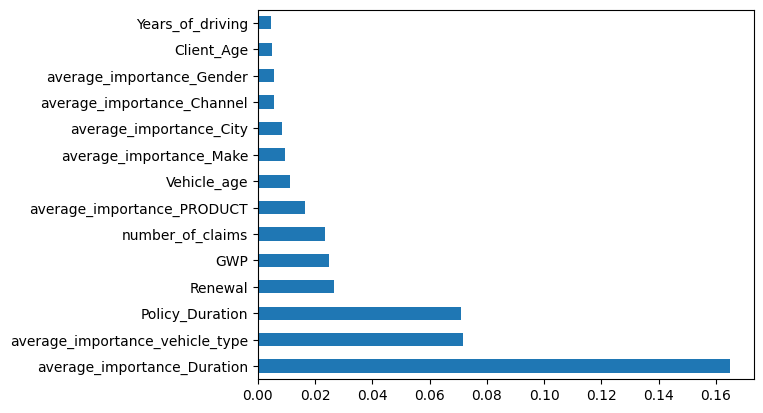

In [19]:
filtered_importances.nlargest(20).plot(kind='barh')

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}\n')


accuracy_enn = accuracy_score(y_test, y_pred_enn)
precision_enn = precision_score(y_test, y_pred_enn)
recall_enn = recall_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

print(f'Accuracy: {accuracy_enn:.4f}')
print(f'Precision: {precision_enn:.4f}')
print(f'Recall: {recall_enn:.4f}')
print(f'F1 Score: {f1_enn:.4f}\n')



accuracy_sm = accuracy_score(y_test, y_pred_sm)
precision_sm = precision_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

print(f'Accuracy: {accuracy_sm:.4f}')
print(f'Precision: {precision_sm:.4f}')
print(f'Recall: {recall_sm:.4f}')
print(f'F1 Score: {f1_sm:.4f}\n')



accuracy_smt = accuracy_score(y_test, y_pred_smt)
precision_smt = precision_score(y_test, y_pred_smt)
recall_smt = recall_score(y_test, y_pred_smt)
f1_smt = f1_score(y_test, y_pred_smt)

print(f'Accuracy: {accuracy_smt:.4f}')
print(f'Precision: {precision_smt:.4f}')
print(f'Recall: {recall_smt:.4f}')
print(f'F1 Score: {f1_smt:.4f}\n')

Accuracy: 0.9769
Precision: 0.9720
Recall: 0.6605
F1 Score: 0.7865

Accuracy: 0.9767
Precision: 0.9540
Recall: 0.6714
F1 Score: 0.7881

Accuracy: 0.9744
Precision: 0.9100
Recall: 0.6690
F1 Score: 0.7711

Accuracy: 0.9780
Precision: 0.9430
Recall: 0.7010
F1 Score: 0.8042



In [20]:
cm = confusion_matrix(y_test, y_pred)
cm_enn = confusion_matrix(y_test, y_pred_enn)
cm_sm = confusion_matrix(y_test, y_pred_sm)
cm_smt = confusion_matrix(y_test, y_pred_smt)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))  


sns.heatmap(cm_smt, ax=axes[0, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 0].set_title("SMOTE-Tomek")
axes[0, 0].set_xlabel("Spėjama klasė")
axes[0, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_sm, ax=axes[0, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 1].set_title("SMOTE")
axes[0, 1].set_xlabel("Spėjama klasė")
axes[0, 1].set_ylabel("Tikra klasė")

sns.heatmap(cm, ax=axes[1, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 0].set_title("Nesubalansuoti")
axes[1, 0].set_xlabel("Spėjama klasė")
axes[1, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_enn, ax=axes[1, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 1].set_title("Edited Nearest Neighbors")
axes[1, 1].set_xlabel("Spėjama klasė")
axes[1, 1].set_ylabel("Tikra klasė")


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(axes[0, 0].collections[0], cax=cbar_ax)


fig.suptitle("Sumaišymo matricos", fontsize=24, va='top')

plt.tight_layout(rect=[0, 0, 0.90, 0.97])  
plt.show()

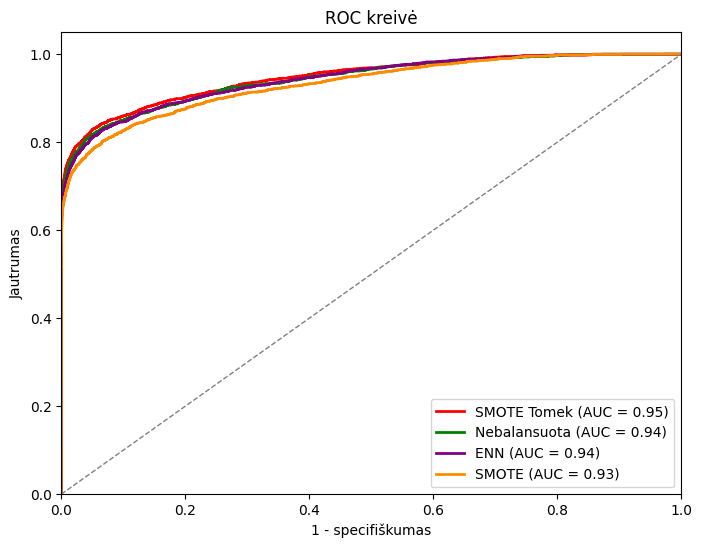

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE Tomek (AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr, tpr, color='green', lw=2, label='Nebalansuota (AUC = %0.2f)' % auc_score)
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()